In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kneed as kn
import plotly.graph_objects as go
import random

In [208]:
from plotly.subplots import make_subplots

#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
from scipy.stats import pearsonr

# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from kneed import KneeLocator
from sklearn.neighbors import NearestNeighbors

In [209]:
from sklearn.metrics import *
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

In [210]:
df = pd.read_csv('train_cleaned_v.2.csv')

In [211]:
df.head()

,originalTitle,rating,startYear,runtimeMinutes,numVotes,totalImages,totalVideos,totalCredits,titleType,canHaveEpisodes,isRatable,isAdult,numRegions,ratingCount,countryOfOrigin,genres,ratingMean,ReviewsTotal,nominations,popularityIndex
0,Neogenic Nightmare Chapter 3: Hydro-Man,"(7, 8]",0.801370,0.070175,0.411369,0.000285,0.000000,0.350105,tvEpisode,False,True,False,0.000000,0.000939,['US'],"Action,Adventure,Animation",0.777778,0.092661,0.000000,0.320071
1,Looping,"(5, 6]",0.712329,0.049123,0.058580,0.000285,0.000000,0.000000,videoGame,False,True,False,0.000000,0.000007,['XWG'],Action,0.555556,0.000000,0.000000,0.032561
2,Idealnaya para,"(5, 6]",0.780822,0.161404,0.158191,0.000285,0.000000,0.368770,movie,False,True,False,0.000000,0.000040,['RU'],Comedy,0.555556,0.092661,0.000000,0.087929
3,MasterChef Celebrity México,"(5, 6]",0.979452,0.092982,0.082893,0.006279,0.000000,0.489104,tvSeries,True,True,False,0.000000,0.000012,['MX'],Reality-TV,0.555556,0.000000,0.000000,0.046572
4,Seutateueob,"(7, 8]",0.972603,0.140351,0.665190,0.099030,0.007752,0.464013,tvSeries,True,True,False,0.788491,0.019052,['KR'],"Comedy,Drama,Romance",0.777778,0.818761,0.213187,0.583243


In [212]:
df.describe()

,startYear,runtimeMinutes,numVotes,totalImages,totalVideos,totalCredits,numRegions,ratingCount,ratingMean,ReviewsTotal,nominations,popularityIndex
count,15925.000000,15925.000000,15925.000000,15925.000000,15925.000000,15925.000000,15925.000000,15925.000000,15925.000000,15925.000000,15925.000000,15925.000000
mean,0.782299,0.104119,0.196306,0.003212,0.001015,0.415279,0.133626,0.001706,0.685805,0.121934,0.046063,0.135731
std,0.177556,0.068448,0.149170,0.019315,0.011514,0.155723,0.200470,0.021971,0.153072,0.163077,0.120917,0.114209
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.684932,0.050877,0.082893,0.000285,0.000000,0.320806,0.000000,0.000012,0.555556,0.000000,0.000000,0.054176
50%,0.815068,0.092982,0.158191,0.000571,0.000000,0.422010,0.000000,0.000040,0.666667,0.092661,0.000000,0.105551
75%,0.924658,0.157895,0.275891,0.001712,0.000000,0.512704,0.257722,0.000183,0.777778,0.185323,0.000000,0.185742
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.604876


In [213]:
del df['popularityIndex']
del df['originalTitle']
del df['rating']
del df['titleType']
del df['countryOfOrigin']
del df['genres']
del df['isAdult']
del df['isRatable']
del df['canHaveEpisodes']

In [214]:
df.head()

,startYear,runtimeMinutes,numVotes,totalImages,totalVideos,totalCredits,numRegions,ratingCount,ratingMean,ReviewsTotal,nominations
0,0.801370,0.070175,0.411369,0.000285,0.000000,0.350105,0.000000,0.000939,0.777778,0.092661,0.000000
1,0.712329,0.049123,0.058580,0.000285,0.000000,0.000000,0.000000,0.000007,0.555556,0.000000,0.000000
2,0.780822,0.161404,0.158191,0.000285,0.000000,0.368770,0.000000,0.000040,0.555556,0.092661,0.000000
3,0.979452,0.092982,0.082893,0.006279,0.000000,0.489104,0.000000,0.000012,0.555556,0.000000,0.000000
4,0.972603,0.140351,0.665190,0.099030,0.007752,0.464013,0.788491,0.019052,0.777778,0.818761,0.213187


In [215]:
#NORMALIZZAZIONE MINMAX O ZSCORE, COMMMENTARE UNA DELLE DUE RIGHE IN BASE AL TIPO DI NORMALIZZAZIONE CHE SI VUOLE UTILIZZARE
#PER I NOSTRI DATI SEMBRA MEGLIO MIN/MAX

scaler = MinMaxScaler()
#scaler = StandardScaler()
train_data = scaler.fit_transform(df)

In [216]:
def create_kdistance_graph(data, k):
  """Crea un grafico k-distance per i dati.

  Args:
    data: Un array numpy contenente i dati.
    k: Il numero di vicini da considerare.

  Returns:
    Un array numpy contenente le distanze k-esimo vicino per ogni punto.
  """

  # Calcola le distanze ai k vicini più vicini per ogni punto
  nbrs = NearestNeighbors(n_neighbors=k+1, algorithm='ball_tree').fit(data)
  distances, indices = nbrs.kneighbors(data)

  # Prendi la distanza dal k-esimo vicino più vicino
  distances = distances[:, k]
  distances = np.sort(distances, axis=0)

  return distances

In [217]:
# Esempio di utilizzo
epsilon_list = []

for k in range(2,51): # Numero di vicini
    distances = create_kdistance_graph(df, k)
    x = np.arange(len(distances))
    kn = KneeLocator(x, distances, curve='convex', direction='increasing')
    elbow_k = kn.elbow
    epsilon = distances[elbow_k]
    epsilon_list.append(epsilon)
    print("Epsilon ottimale secondo il metodo del gomito: k={} epsilon={}".format(k, epsilon))

media_epsilon = np.mean(epsilon_list)
print("La media degli epsilon è:", media_epsilon)


Epsilon ottimale secondo il metodo del gomito: k=2 epsilon=0.25567091861459307
Epsilon ottimale secondo il metodo del gomito: k=3 epsilon=0.29791198648429795
Epsilon ottimale secondo il metodo del gomito: k=4 epsilon=0.28475160137786387
Epsilon ottimale secondo il metodo del gomito: k=5 epsilon=0.2968740340893629
Epsilon ottimale secondo il metodo del gomito: k=6 epsilon=0.32815668060959546
Epsilon ottimale secondo il metodo del gomito: k=7 epsilon=0.28584751400708913
Epsilon ottimale secondo il metodo del gomito: k=8 epsilon=0.5448946037974991
Epsilon ottimale secondo il metodo del gomito: k=9 epsilon=0.3042724360094834
Epsilon ottimale secondo il metodo del gomito: k=10 epsilon=0.29258992231591907
Epsilon ottimale secondo il metodo del gomito: k=11 epsilon=0.31444032685149753
Epsilon ottimale secondo il metodo del gomito: k=12 epsilon=0.2954659317803668
Epsilon ottimale secondo il metodo del gomito: k=13 epsilon=0.3049330121975564
Epsilon ottimale secondo il metodo del gomito: k=14 e

0.3365928262170193


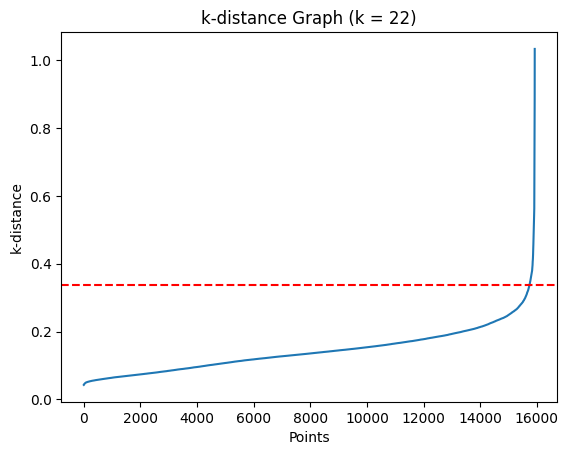

In [254]:
distances = create_kdistance_graph(df, 22)
kn = KneeLocator(x, distances, curve='convex', direction='increasing')
elbow_k = kn.elbow
epsilon = distances[elbow_k]
print(epsilon)

# Plotta il grafico
plt.plot(distances)
# Aggiungi la linea orizzontale
plt.axhline(y=epsilon, color='r', linestyle='--')
plt.xlabel('Points')
plt.ylabel('k-distance')
plt.title('k-distance Graph (k = 22)')
plt.show()

In [255]:
# density based clustering
print('DBSCAN')

dbscan = DBSCAN(eps=0.4, min_samples=22, metric='euclidean')
dbscan.fit(df)

hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))
print('labels', dict(zip(bins, hist)))
print('silhouette', silhouette_score(df[dbscan.labels_ != -1], dbscan.labels_[dbscan.labels_ != -1]))

DBSCAN
labels {np.int64(-1): np.int64(20), np.int64(0): np.int64(15905), np.int64(1): np.int64(0)}


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)